In [111]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

import transform
import statistics
import simulation
import dsfdr

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## preliminary simulation

In [2]:
np.random.seed(31)

ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh0 = []
sig_fbh0 = []
sig_ds0 = []

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

pval_bh0 = []
pval_fbh0 = []
pval_ds0 = []

for j in ss0:
    for i in range(B):
        data0, labels0 = simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=0)
        rej_bh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        pval_bh0.append(rej_bh0[2])
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)
        pval_fbh0.append(rej_fbh0[2])

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)
        pval_ds0.append(rej_ds0[2])

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

In [106]:
with open("simulation0_v2.pkl", "wb") as f:
    pickle.dump({'ss0': ss0, 'otu_bh0': otu_bh0, 'otu_fbh0': otu_fbh0, 'otu_ds0': otu_ds0, 
                 'pval_bh0': pval_bh0, 'pval_fbh0': pval_fbh0, pval_ds0}, f)

<IPython.core.display.Javascript object>


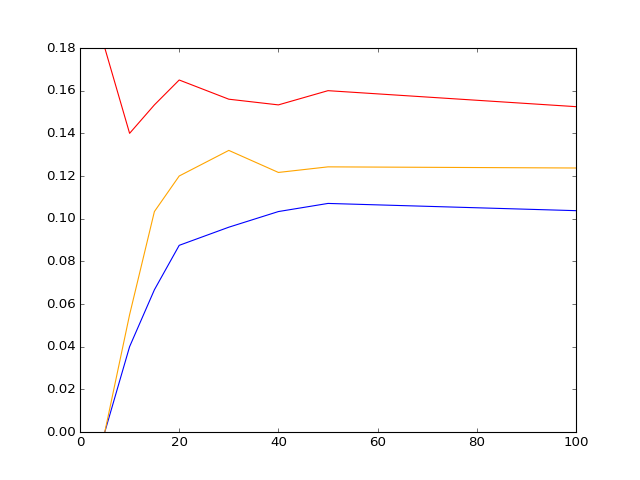

In [4]:
plt.figure()
plt.plot(ss0, otu_bh0, color = 'blue')
plt.plot(ss0, otu_fbh0, color = 'orange')
plt.plot(ss0, otu_ds0, color = 'red')

In [5]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)

gap = []
for i in range(100):
    dist = x[i] - y[i]
    if dist > 0:
        gap.append(dist)
    if dist <= 0:
        gap.append(0)
norm = np.sum(gap)
print(norm)

1.06185814186


1.96344655345


<IPython.core.display.Javascript object>


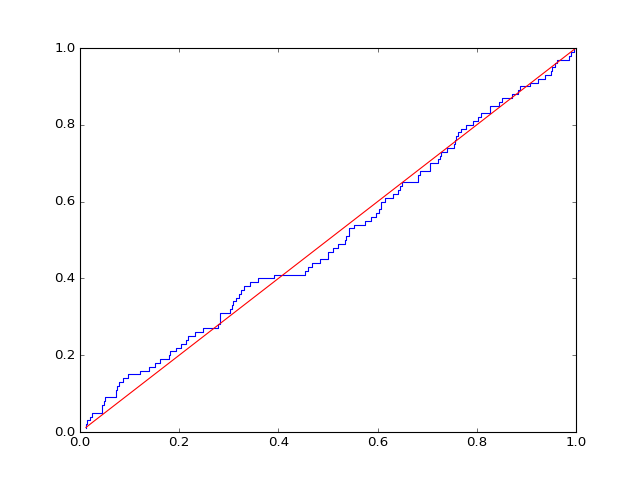

In [6]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

## simulation 1

In [7]:
np.random.seed(31)

B = 100
ss1 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh1 = []
fdr_fbh1 = []
fdr_ds1 = []

sig_bh1 = []
sig_fbh1 = []
sig_ds1 = []

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

pval_bh1 = []
pval_fbh1 = []
pval_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

for j in ss1:
    for i in range(B):
        data1,labels1 = simulation.simulatedat(numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='bhfdr')
        rej_fbh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='filterBH')
        rej_ds1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')
        
        v_bh1 = np.sum(np.where(rej_bh1[0])[0]>=100)
        r_bh1 = np.sum(rej_bh1[0])
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        pval_bh1.append(rej_bh1[2])
        
        v_fbh1 = np.sum(np.where(rej_fbh1[0])[0]>=100)
        r_fbh1 = np.sum(rej_fbh1[0])
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        pval_fbh1.append(rej_fbh1[2])
        
        v_ds1 = np.sum(np.where(rej_ds1[0])[0]>=100)
        r_ds1 = np.sum(rej_ds1[0])
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)
        pval_ds1.append(rej_ds1[2])

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))
 

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


In [16]:
with open("simulation1.pkl", "wb") as f:
    pickle.dump((ss1, otu_bh1, otu_fbh1, otu_ds1, 
                 FDR_bh1, FDR_fbh1, FDR_ds1, 
                 pval_bh1, pval_fbh1, pval_ds1), f)

In [103]:
with open("simulation1_v2.pkl", "wb") as f:
    pickle.dump({'ss1': ss1, 'otu_bh1': otu_bh1, 'otu_fbh1': otu_fbh1, 'otu_ds1': otu_ds1, 
                 'FDR_bh1': FDR_bh1, 'FDR_fbh1': FDR_fbh1, 'FDR_ds1': FDR_ds1, 
                 'pval_bh1': pval_bh1, 'pval_fbh1': pval_fbh1, 'pval_ds1': pval_ds1}, f)

In [105]:
with open("simulation1_v2.pkl", "rb") as f:
    res1 = pickle.load(f)
print(res1['otu_fbh1'])

[14.24, 57.920000000000002, 72.900000000000006, 80.232500000000002, 84.554000000000002, 87.478333333333339, 89.537142857142854, 91.167500000000004, 92.578888888888883, 93.614000000000004, 94.464545454545458, 95.141666666666666, 95.691538461538457]


<IPython.core.display.Javascript object>


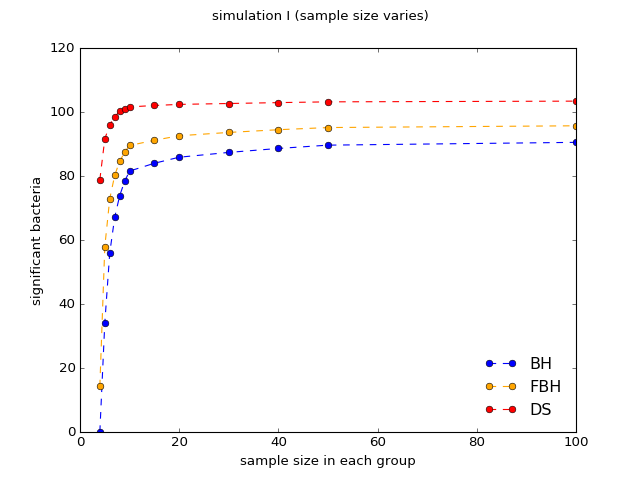

In [17]:
plt.figure()
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


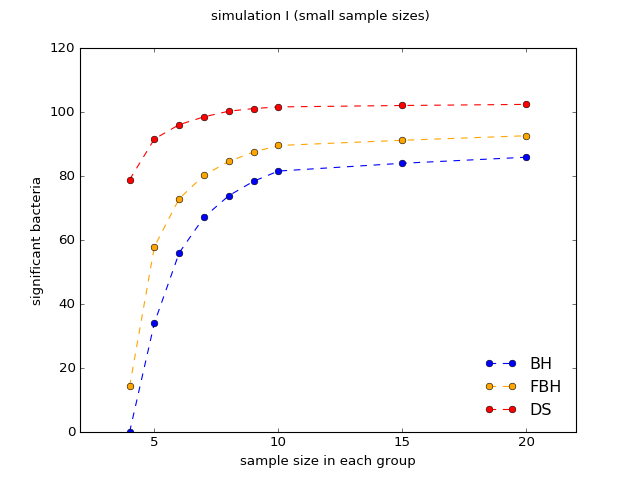

In [18]:
plt.figure()
plt.plot(ss1[0:9], otu_bh1[0:9], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1[0:9], otu_fbh1[0:9], linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1[0:9], otu_ds1[0:9], linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.xlim([2, 22])
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (small sample sizes)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


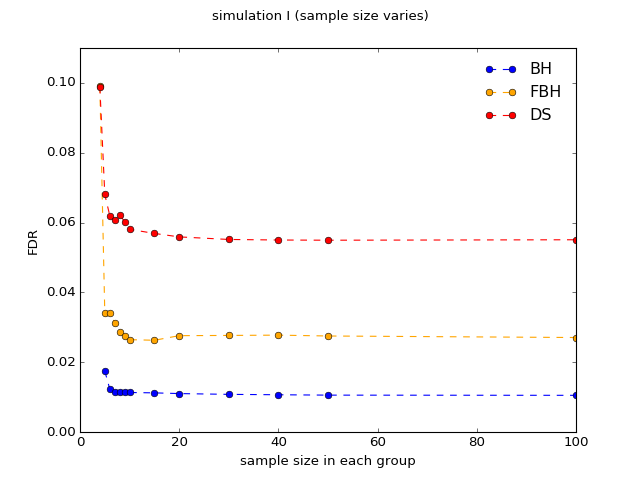

In [19]:
plt.figure()
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
pylab.ylim([0, 0.11])
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')

In [20]:
# calculate L1 norms for sample size = 4, 6, 10

pval_ds1 = np.asarray(pval_ds1)
L1_4 = []
L1_6 = []
L1_10 = []

for i in range(100):
    x = pval_ds1[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4.append(LA.norm(x - y, 1))

for j in np.arange(200, 300, 1):
    x = pval_ds1[j, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_6.append(LA.norm(x - y, 1))
    
for k in np.arange(600, 700, 1):
    x = pval_ds1[k, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10.append(LA.norm(x - y, 1))   
    
print(np.mean(L1_4), np.mean(L1_6), np.mean(L1_10))

101.496539827 98.4316950827 96.7579452325


<IPython.core.display.Javascript object>


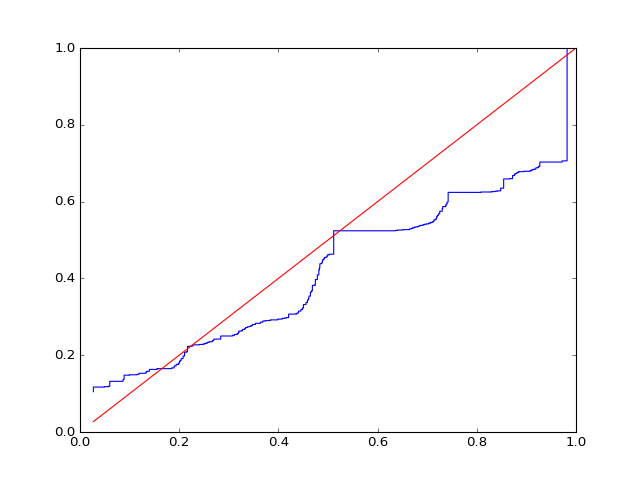

In [24]:
sample1 = pval_ds1[98]  # pvals for smaple size = 4
ecdf1 = ECDF(sample1)

x1 = np.sort(sample1)
y1 = ecdf(x1)
plt.figure()
plt.step(x1, y1)
plt.plot(x1, x1, color = 'red')


<IPython.core.display.Javascript object>


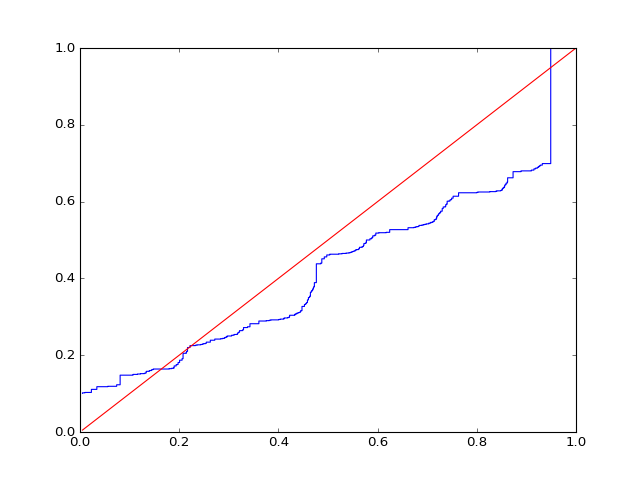

74.0706623377


In [27]:
sample2 = pval_ds1[298]  # pvals for smaple size = 6
ecdf2 = ECDF(sample2)

#x = np.linspace(min(sample), max(sample))
x2 = np.sort(sample2)
y2 = ecdf(x2)
plt.figure()
plt.step(x2, y2)
plt.plot(x2, x2, color = 'red')
print(LA.norm(x2-y2, 1))

<IPython.core.display.Javascript object>


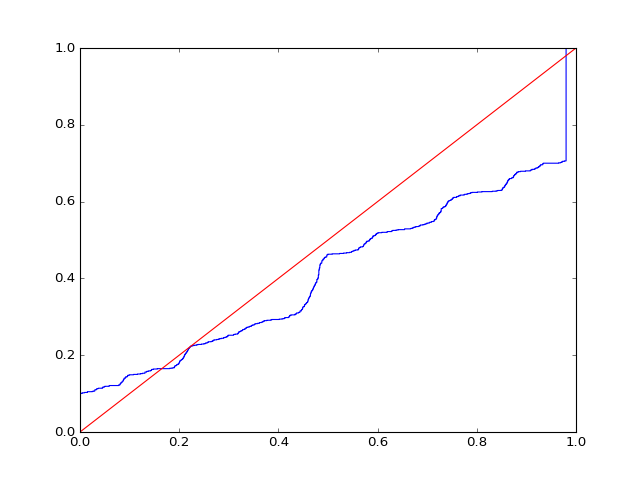

In [32]:
sample3 = pval_ds1[620]  # pvals for smaple size = 10
ecdf3 = ECDF(sample3)

#x = np.linspace(min(sample), max(sample))
x3 = np.sort(sample3)
y3 = ecdf(x3)
plt.figure()
plt.step(x3, y3)
plt.plot(x3, x3, color = 'red')


In [108]:
sample1 = pval_ds1[98]  # pvals for smaple size = 4
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf(x1)

sample2 = pval_ds1[298]  # pvals for smaple size = 6
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf(x2)

sample3 = pval_ds1[620]  # pvals for smaple size = 10
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf(x3)

In [110]:
print(sum(x1))
print(sum(y1))

628.803196803
515.79980198


<IPython.core.display.Javascript object>


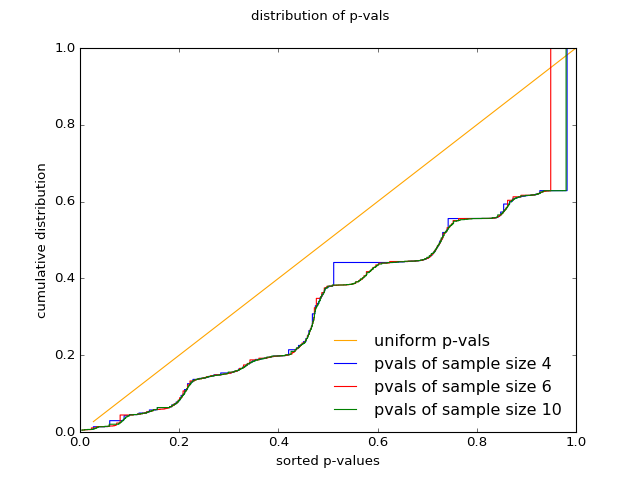

In [109]:
plt.figure()
plt.plot(x1, x1, color = 'orange', label = 'uniform p-vals')
plt.step(x1, y1, color = 'blue', label = 'pvals of sample size 4')
plt.step(x2, y2, color = 'red', label = 'pvals of sample size 6')
plt.step(x3, y3, color = 'green', label = 'pvals of sample size 10')
pylab.legend(loc ='lower right', frameon=False)
#pylab.ylim([0, 0.11])
plt.suptitle('distribution of p-vals')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')

## simulation 2

In [41]:
np.random.seed(31)

B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh2 = []
fdr_fbh2 = []
fdr_ds2 = []

sig_bh2 = []
sig_fbh2 = []
sig_ds2 = []

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []

pval_bh2 = []
pval_fbh2 = []
pval_ds2 = []

for j in d:
    for i in range(B):
        data2,labels2 = simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        v_bh2 = np.sum(np.where(rej_bh2[0])[0]>=100)
        r_bh2 = np.sum(rej_bh2[0])
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        pval_bh2.append(rej_bh2[2])
        
        v_fbh2 = np.sum(np.where(rej_fbh2[0])[0]>=100)
        r_fbh2 = np.sum(rej_fbh2[0])
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        pval_fbh2.append(rej_fbh2[2])
        
        v_ds2 = np.sum(np.where(rej_ds2[0])[0]>=100)
        r_ds2 = np.sum(rej_ds2[0])
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
        pval_ds2.append(rej_ds2[2])
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))
 



otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


In [65]:
pval_ds2 = np.ndarray.tolist(pval_ds2)

In [70]:
with open("simulation2.pkl", "wb") as f:
    pickle.dump((d, otu_bh2, otu_fbh2, otu_ds2, 
                 FDR_bh2, FDR_fbh2, FDR_ds2, 
                 pval_bh2, pval_fbh2, pval_ds2), f)

In [107]:
with open("simulation2_v2.pkl", "wb") as f:
    pickle.dump({'d': d, 'otu_bh2': otu_bh2, 'otu_fbh2': otu_fbh2, 'otu_ds2': otu_ds2, 
                 'FDR_bh2': FDR_bh2, 'FDR_fbh2': FDR_fbh2, 'FDR_ds2': FDR_ds2, 
                 'pval_bh2': pval_bh2, 'pval_fbh2': pval_fbh2, 'pval_ds2': pval_ds2}, f)

In [72]:
L1_4k = []

#pval_ds2 = np.asarray(pval_ds2) # pval_ds2 = np.ndarray.tolist(pval_ds2)
for i in np.arange(300, 400, 1):
    x = pval_ds2[0][i][100:]
    #x = pval_ds2[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4k.append(LA.norm(x - y, 1))

IndexError: invalid index to scalar variable.

In [46]:
# calculate L1 norms for noise size = 4k, 8k, 10k, 15k, 20k
L1_4k = []
L1_8k = []
L1_10k = []
L1_15k = []
L1_20k = []

#pval_ds2 = np.asarray(pval_ds2) # pval_ds2 = np.ndarray.tolist(pval_ds2)
for i in np.arange(300, 400, 1):
    x = pval_ds2[0][i][100:]
    #x = pval_ds2[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4k.append(LA.norm(x - y, 1))

for j in np.arange(400, 500, 1):
    #x = pval_ds2[0][j][100:]
    x = pval_ds2[j, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_8k.append(LA.norm(x - y, 1))
    
for k in np.arange(500, 600, 1):
    #x = pval_ds2[0][k][100:]
    x = pval_ds2[k, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10k.append(LA.norm(x - y, 1))   

for m in np.arange(600, 700, 1):
    #x = pval_ds2[0][m][100:]
    x = pval_ds2[m, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_15k.append(LA.norm(x - y, 1))  
    
for n in np.arange(700, 800, 1):
    #x = pval_ds2[0][n][100:]
    x = pval_ds2[n, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_20k.append(LA.norm(x - y, 1))      
    
    
print(np.mean(L1_4k), np.mean(L1_8k), np.mean(L1_10k), np.mean(L1_15k), np.mean(L1_20k))

IndexError: too many indices for array

<IPython.core.display.Javascript object>


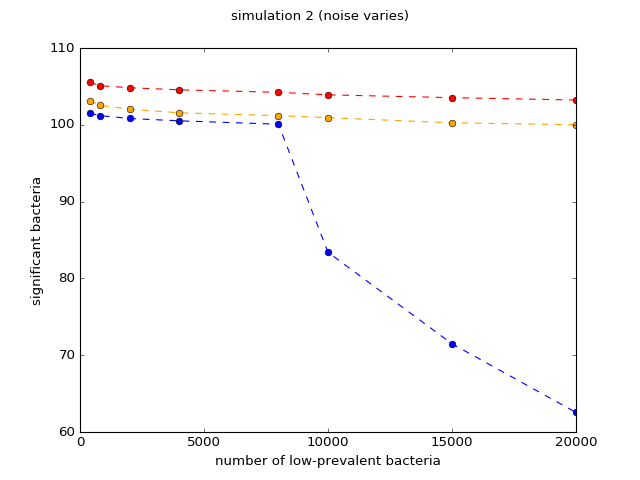

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [78]:
plt.figure()
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


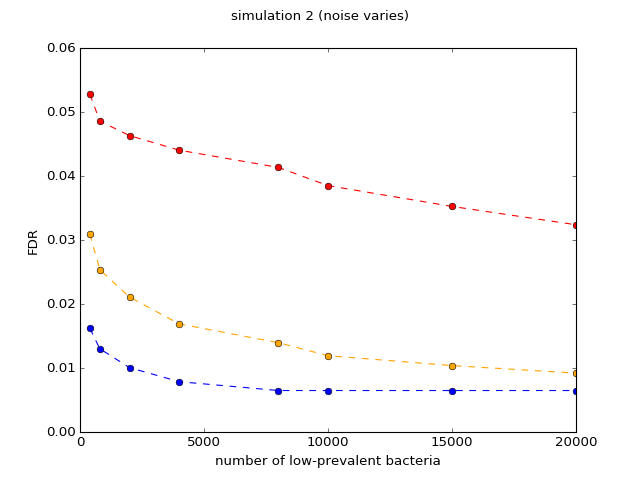

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [79]:
plt.figure()
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')

<IPython.core.display.Javascript object>


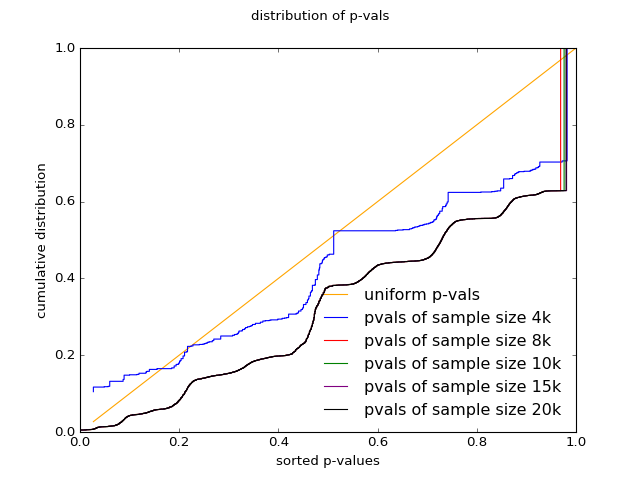

In [93]:
plt.figure()
plt.plot(x1, x1, color = 'orange', label = 'uniform p-vals')
plt.step(x1, y1, color = 'blue', label = 'pvals of sample size 4k')
plt.step(x2, y2, color = 'red', label = 'pvals of sample size 8k')
plt.step(x3, y3, color = 'green', label = 'pvals of sample size 10k')
plt.step(x4, y4, color = 'purple', label = 'pvals of sample size 15k')
plt.step(x5, y5, color = 'black', label = 'pvals of sample size 20k')
pylab.legend(loc ='lower right', frameon=False)
#pylab.ylim([0, 0.11])
plt.suptitle('distribution of p-vals')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')

<IPython.core.display.Javascript object>


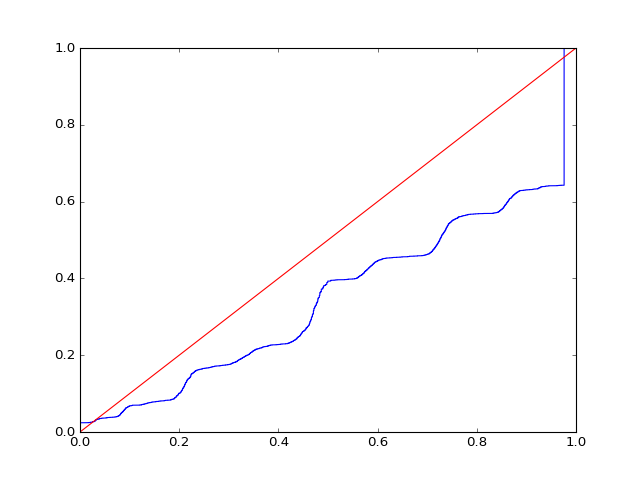

414.661163836


In [80]:
sample1 = pval_ds2[398]  # pvals for d=4k
ecdf1 = ECDF(sample1)

#x = np.linspace(min(sample), max(sample))
x1 = np.sort(sample1)
y1 = ecdf(x1)
plt.figure()
plt.step(x1, y1)
plt.plot(x1, x1, color = 'red')
print(LA.norm(x1 - y1, 1))

<IPython.core.display.Javascript object>


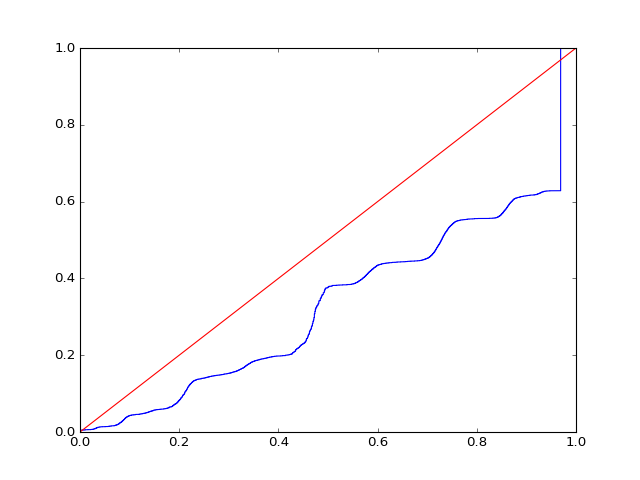

908.723299918


In [85]:
sample2 = pval_ds2[498]  # pvals for d=8k
ecdf2 = ECDF(sample2)

#x = np.linspace(min(sample), max(sample))
x2 = np.sort(sample2)
y2 = ecdf(x2)
plt.figure()
plt.step(x2, y2)
plt.plot(x2, x2, color = 'red')
print(LA.norm(x2 - y2, 1))

<IPython.core.display.Javascript object>


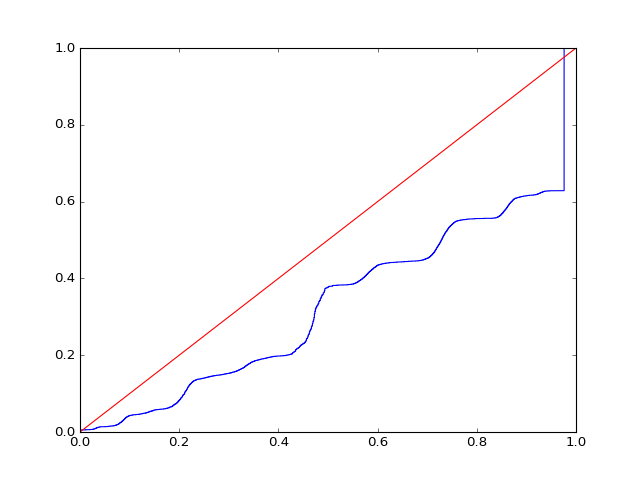

1147.14294735


In [86]:
sample3 = pval_ds2[598]  # pvals for d=10k
ecdf3 = ECDF(sample3)

#x = np.linspace(min(sample), max(sample))
x3 = np.sort(sample3)
y3 = ecdf(x3)
plt.figure()
plt.step(x3, y3)
plt.plot(x3, x3, color = 'red')
print(LA.norm(x3-y3, 1))

<IPython.core.display.Javascript object>


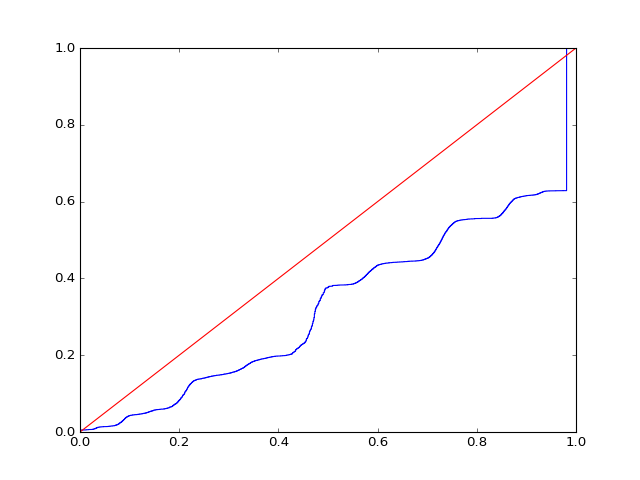

1692.07532586


In [87]:
sample4 = pval_ds2[688]  # pvals for smaple size = 15k
ecdf4 = ECDF(sample4)

#x = np.linspace(min(sample), max(sample))
x4 = np.sort(sample4)
y4 = ecdf(x4)
plt.figure()
plt.step(x4, y4)
plt.plot(x4, x4, color = 'red')
print(LA.norm(x4-y4, 1))

<IPython.core.display.Javascript object>


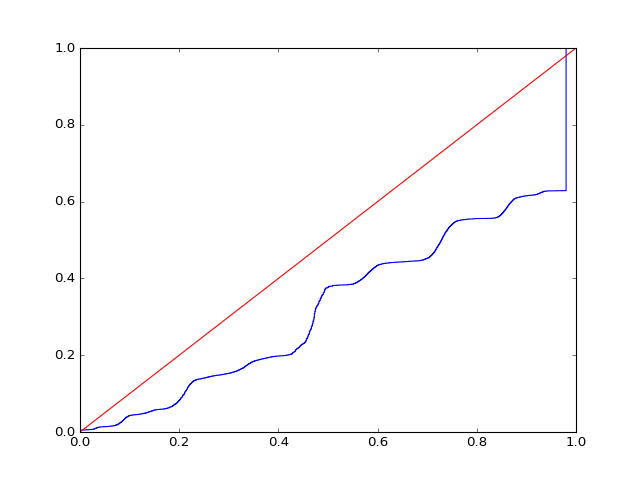

2237.37961534


In [88]:
sample5 = pval_ds2[778]  # pvals for smaple size = 20k
ecdf5 = ECDF(sample5)

#x = np.linspace(min(sample), max(sample))
x5 = np.sort(sample5)
y5 = ecdf(x5)
plt.figure()
plt.step(x5, y5)
plt.plot(x5, x5, color = 'red')
print(LA.norm(x5 - y5, 1))